# Handling FITS Files 

* [Format definition of HEALPIX headers in FITS for Maps](https://gamma-astro-data-formats.readthedocs.io/en/latest/skymaps/healpix/index.html#healpix-skymap)
* https://docs.gammapy.org/dev/_modules/gammapy/maps/hpx.html
* https://clumpy.gitlab.io/CLUMPY/quick_start.html#displaying-a-2d-run-with-python


## Setup

In [1]:
from astropy.io import fits
from gammapy.maps import Map
from matplotlib import pyplot as plt
import healpy as hp

outfile = 'annihil_Perseus_A4262D_FOVdiameter2.0deg_nside1024.fits'
hdulist = fits.open(outfile)

In [2]:
hdulist.info()

Filename: annihil_Perseus_A4262D_FOVdiameter2.0deg_nside1024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   ()      
  1  JFACTOR       1 BinTableHDU    144   960R x 6C   [1J, 1E, 1E, 1E, 1E, 1E]   
  2  JFACTOR_PER_SR    1 BinTableHDU    144   960R x 6C   [1J, 1E, 1E, 1E, 1E, 1E]   
  3  INTEGRATED_FLUXES    1 BinTableHDU    172   960R x 5C   [1J, 1E, 1E, 1E, 1E]   


In [3]:
hdu = hdulist[3]
hdu.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   20 / width of table in bytes                        
NAXIS2  =                  960 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    5 / number of fields in each row                   
TTYPE1  = 'PIXEL   '           / label for field   1                            
TFORM1  = '1J      '           / data format of field: 4-byte INTEGER           
TTYPE2  = 'Flux_gamma'         / label for field 2                              
TFORM2  = '1E      '           / data format of field: 4-byte REAL              
TUNIT2  = 'cm^-2 s^-1'      

In [4]:
keywds = (
    'HPX_CONV',
    'PIXTYPE',
    'INDXSCHM',
    'ORDERING',
    'COORDSYS',
    'ORDER',
    'NSIDE',
    'FIRSTPIX',
    'LASTPIX',
    'HPX_REG',
    'BANDSHDU',
)     
          
for kw in keywds:
    if kw in hdu.header:
        print(kw, ':', hdu.header[kw])
    else:
        print(kw, '')

HPX_CONV 
PIXTYPE : HEALPIX
INDXSCHM : EXPLICIT
ORDERING : NESTED
COORDSYS : G
ORDER 
NSIDE : 1024
FIRSTPIX 
LASTPIX 
HPX_REG 
BANDSHDU 


In [5]:
print(hdu.header['TTYPE1'], hdu.header['TTYPE2'])

PIXEL Flux_gamma


In [6]:
hdu.header['HPX_CONV'] = 'FGST-SRCMAP'
hdu.header['TTYPE1'] = 'PIX'
hdu.header['COORDSYS'] = 'GAL'
#hdu.header['TTYPE2'] = 'CHANNEL0'
#hdu.header

In [7]:
hdu.writeto('annihil_modified.fits', overwrite=True)

In [8]:
outfile='annihil_modified.fits'
#outfile = 'annihil_Perseus_A4262D_FOVdiameter2.0deg_nside1024.fits'

(<Figure size 432x288 with 1 Axes>,
 None)

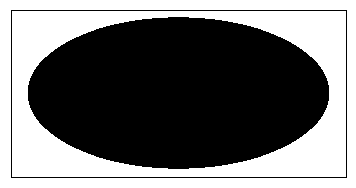

In [9]:
map_dm = Map.read(outfile)
map_dm.plot(vmin=3.34e-18, vmax=5e-17)

In [10]:
print(map_dm.geom)

HpxGeom

	axes       : skycoord
	shape      : (12582912,)
	ndim       : 2
	nside      : 1024
	nested     : True
	coordsys   : GAL
	projection : HPX
	center     : 0.0 deg, 0.0 deg



In [11]:
outfile = 'annihil_Perseus_A4262D_FOVdiameter2.0deg_nside1024.fits'

In [12]:
ext = 3 # fluxes and intensities
col = 1 # gamma-ray intensity
data = hp.read_map(outfile, partial=True, hdu=ext, field=col-1)

NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = EXPLICIT
Ordering converted to RING


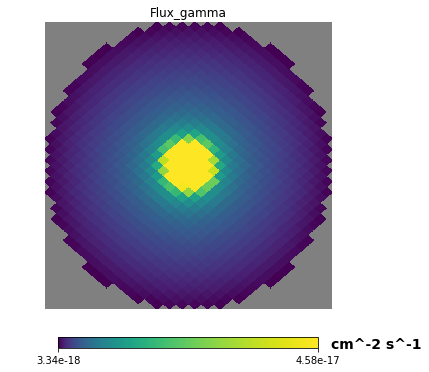

In [13]:
hdulist = fits.open(outfile)
dtheta = hdulist[ext].header['SIZE_Y']
dtheta_orth = hdulist[ext].header['SIZE_X']
title = hdulist[ext].header['TTYPE'+str(col+1)]
units = hdulist[ext].header['TUNIT'+str(col+1)]
hdulist.close()
hp.cartview(data, lonra=[-dtheta_orth/2,dtheta_orth/2], latra=[-dtheta/2,dtheta/2], norm='log', max=data.max()/10, title=title, unit=units)

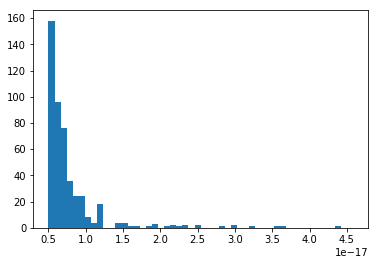

In [14]:
plt.hist(data, bins=50, range=(5e-18, 4.58e-17));